#  Naive Bayes

Welcome to a Jupyter Notebook! In these notebooks, we can seamlessly interweave code and text. We can even insert math! $P(C_k \, | \, X_1...X_n)$

## Naive Bayes from Scratch

Although we will be implementing several flavors of Naive Bayes using Scikit-Learn, one of the main Python libraries for machine learning, it is possible to code the whole thing up from scratch. If you are interested, check out *Data Science from Scratch* by Joel Grus. 

## Naive Bayes with Scikit Learn

First, let's get everything we need together. This means loading (with "import") the appropriate modules and sub-modules. Scikit-Learn has a bunch of built-in data for playing and testing, so we will use one of these for our text applications. 

In [12]:
%matplotlib inline
import numpy as np #Numpy allows us to do heavy-duty math in Python.
import matplotlib.pyplot as plt #This will let us do some plotting. Matplotlib is a powerful plotting library.
import seaborn as sns; sns.set() #Seaborn is a newer library, focused on statistical visualization.
#sns.set() resets Seaborn to the default plotting parameters.
#This is one way to make a comment. We typically use it for short comments.
"""
This is how we make longer comments. Typically, we use this for comments that will span multiple lines. It is a good
idea to comment your code, even if only you will ever see it, because you will forget, amazingly quickly, whether you 
remembered to deal with a particular issue, why you chose to write something in a particular way, etc. You should just
think about "future you" like another user, who may have a bit more of the same knowledge as "current you," compared to 
an arbitrary user, but is nowhere near as knowledgeable as "current you." I cannot tell you how much time I have wasted
or how much anxiety I have experienced because I did not comment my code enough. 

A couple of other notes. It is common practice to rename particular modules/packages/libraries using "as." It is also
considered poor form to import EVERYTHING from a library; you are supposed to only import what you need. We will do
this below in scikit learn.
"""; #If you are curious why there is a semi-colon here, just try removing it. 

Now let's get some data. The examples here are drawn from the *Python Data Science Handbook* by Jake VanderPlas.

In [1]:
from sklearn.datasets import fetch_20newsgroups 
data = fetch_20newsgroups() #Free data to play with: documents from a newsgroup corpus.
data.target_names #Possible categories, i.e., the newsgroups. Note that real world data will not have these methods.

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For illustrative purposes, we are going to pick a subset of these. 

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course
#Here we are making a list of specific categories. 
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
#Our dataset has the built-in capacity to pull out the training and test set, only keeping examples that match categories

It is usually a good idea to look at your data. So let's first see how many training and test examples we have.

In [3]:
len(train.data) #Here I have assumed that each line of train.data is a data instance; we'll check that below.

2153

In [4]:
len(test.data) #Same thing for testing -- it's about 60% training, 40% testing. 
#Note that there are much fancier things to do here, like cross-validation, that we'll cover later.

1432

In [5]:
print(train.data[5]) #Let's look at a single example of trianing data. How can you look at a different example?

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Clearly we are going to need to do a little work to turn this into something we can feed our Naive Bayes classifier. In other words, we need to turn this text into a vector of features $X_1, X_2, \dots X_n$. Scikit Learn has some built-in tools to do this, called vectorizers. Which vectorizer we use depends on what kind of Naive Bayes we are doing. This choice, for text data, corresponds to a choice of generative model, i.e., our picture of how the text is written down: Bernoulli or Multinomial. 

## Bernoulli Naive Bayes

Here's one pretty brutal way to model the text. Given a vocabulary $w_1,\dots,w_n$, let $X_i$ be the event "message contains $w_i$." $X_i = x_i, x_i \in \{0,1\}$. To create this text representation, we use the following:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer  #Feature extraction
#Note that this vectorizer can be used to create count features or binary/boolean features

### Mathematical Preliminaries

Recall the key independence assumption of Naive Bayes: $P(X_1 = x_1,\dots,X_n = x_n\,|\,C_k) = P(X_1 = x_1\,|\,C_k)\times \dots 
    \times P(X_n = x_n\,|\,C_k)$

Bernoulli Naive Bayes means that we assume the following: to produce a newsgroup post, a class is chosen according to the prior $P(C_k)$ and then conditional on that class, we decide whether each word $w_i$ is present or absent with probability $P(X_i = x_i | C_k)$. This is our generative model. 


In [7]:
from sklearn.naive_bayes import BernoulliNB #Our learner. This is generic scikit learn syntax.
from sklearn.pipeline import make_pipeline #A cool feature of scikit learn. Because we need to vectorize before using 
model = make_pipeline(CountVectorizer(binary=True), BernoulliNB()) 
#When deployed on a dataset, this applies the vectorizer, then trains Multinomial NB
#binary = True in CountVectorizer forces this to turn the counts into Booleans
#Read more about it at: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer


In [8]:
model.fit(train.data,train.target) #Training syntax: feed the fit method the training data and the training targets
#In other words, give it the class labels that have already been assigned to the training data.
"""
This one line of code takes our training examples (bunch of posts), turns each post into a vector of 0's and 1's,
and then learns the prior and likelihoods from the data. By default, it also applies Laplace smoothing with smoothing
parameter = 1
""";

Now that we have trained the model, we can use it to predict the classes of the test data!

In [9]:
labels = model.predict(test.data) #That's it! 

Because we know for the test data what the correct classes are, we can (and should) see how well our classifier is performing. One simple way to do this is just to see how many examples it classifies correctly. 

In [10]:
from sklearn.metrics import accuracy_score #This is just the fraction of examples classified correctly.
accuracy_score(test.target,labels)

0.77513966480446927

Another handy way to assess performance is the confusion matrix:

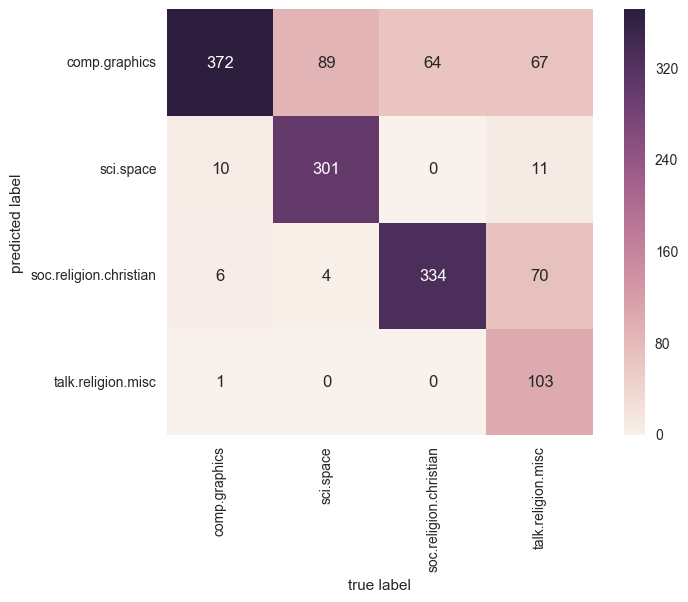

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Think** about where you might look for other ways of assessing model performance...

## Multinomial Naive Bayes

Multinomial Naive Bayes means that we assume the following: to produce a newsgroup post, a class is chosen according to the prior $P(C_k)$ and then conditional on that class, we generate each word by drawing it from the set of all words with probabilities $p_1,p_2,\dots p_n$ where these probabilities depend on the class. $X_i$ now counts the number of times $w_i$ appears in the message; note that these RVs are conditionally independent given the class. The likelihood takes on a convenient form: $P(X_1 = x_1, \dots, X_i = x_i, \dots X_n = x_n \,|\, C_k) \propto \prod_j p_j ^{x_j}$ (where, again, the pararameters $p_1,\dots p_n$ depend on the class. This is our generative model. 

How would you change the following code block to implement Multinomial Naive Bayes?

In [36]:
from sklearn.naive_bayes import MultinomialNB #Our learner. This is generic scikit learn syntax.
from sklearn.pipeline import make_pipeline #A cool feature of scikit learn. Because we need to vectorize before using 
model = make_pipeline(CountVectorizer(), MultinomialNB()) 
#When deployed on a dataset, this applies the vectorizer, then trains Multinomial NB
#binary = True in CountVectorizer forces this to turn the counts into Booleans


In [37]:
from sklearn.naive_bayes import MultinomialNB #Our learner. This is generic scikit learn syntax.
from sklearn.pipeline import make_pipeline #A cool feature of scikit learn. Because we need to vectorize before using 
modelMNB1 = make_pipeline(CountVectorizer(), MultinomialNB()) 
modelMNB1.fit(train.data,train.target) 

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [33]:
#Here's an alternative way to do the same thing... We will follow this pattern in the homework. 
from sklearn.naive_bayes import MultinomialNB
vectorizerC = CountVectorizer() #Get the vectorizer ready to go
training_features_count = vectorizerC.fit_transform(train.data) #The vectorizer needs to learn the vocabulary
#Then it transforms the training data
test_features = vectorizerC.transform(test.data) #Now we can transform the testing data. 
#Try switching the order to see what goes wrong.
modelMNB2 = MultinomialNB() #Now we get the learner ready to go.
modelMNB2.fit(training_features_count,train.target) #Now we fit the learner on transformed features of the training set
#using the target labels.

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
labelsMNB1 = modelMNB1.predict(test.data) #That's it! Here, we do NOT have to pre-transform the test data
labelsMNB2 = modelMNB2.predict(test_features) #Here we do, because the model doesn't contain a vectorizer

In [40]:
accuracy_score(test.target,labelsMNB2) #Check that the accuracy score is the same for both

0.91689944134078216